In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle

path = 'data/'

energyScale = 10 # [MeV] energy scale for creating unitless quantities

# importing C12 and O16 data: excitation energies [MeV] and GT strengths [unitless]
C12_data = 'C12_dEs_GTs.txt'
O16_data = 'O16_dEs_GTs.txt'
C12df = pd.read_csv(C12_data, sep='\t', names=['dE [MeV]', 'GT'], skiprows=1, float_precision='round_trip')
O16df = pd.read_csv(O16_data, sep='\t', names=['dE [MeV]', 'GT'], skiprows=1, float_precision='round_trip')

# nuclear info dictionary
nuc_dict = {'C12': {'mass [MeV]': 11274.78, 'mass [unitless]': 11274.78/energyScale, 'spin': 0.0, 'dEs [MeV]': C12df['dE [MeV]'], 'GTs': C12df['GT']}, \
            'O16': {'mass [MeV]': 15033.04, 'mass [unitless]': 15033.04/energyScale, 'spin': 0.0, 'dEs [MeV]': O16df['dE [MeV]'], 'GTs': O16df['GT']}}
# 'He4': {'mass_MeV': 3758.26, 'mass [unitless]': 3758.26/energyScale, 'spin': 0.0}
# 'N14': {'mass_MeV': 13153.91, 'mass [unitless]': 13153.91/energyScale, 'spin': 0.0}

max_dict = {'C12': 33, 'O16': 38}


In [2]:
magma = {'black': '#000004', 
         'purple': '#3b0f70', 
         'pink-purple': '#8c2981', 
         'pink-red': '#de4968', 
         'orange': '#fe9f6d', 
         'pale yellow': '#fcfdbf'}

magma_8 = {'dark purple': '#221150',
           'purple': '#5f187f',
           'pink-purple': '#982d80',
           'pink-red': '#d3436e',
           'orange': '#f8765c',
           'light orange': '#febb81',
           'pale yellow': '#fcfdbf'}

axis_label_fontsize = 18
axis_ticks_fontsize = 14
legend_title_fontsize = 16
legend_fontsize = 14
legend_fontsize_small = 11
extra_thick_linewidth = 4
thick_linewidth = 3
med_linewidth = 2
marker_size = 6
fig_size = (8.0, 6.0)

plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rc('text', usetex=True)
matplotlib.rcParams["figure.dpi"] = 300
plt.rcParams.update({'font.size': 14})

In [17]:
magma_6 = ['#000004', '#3b0f70', '#8c2981', '#de4968', '#fe9f6d', '#fcfdbf']

In [3]:
##############################################

# parameters
# RECT_WIDTH = 0.1 # width of the rectangle
# ALPHA = 0.6 # transparency of the rectangle

SELECT = 'all' # which experiments to plot: 'all', 'future', 'current'

EXPERIMENT_DICT = {
    # experiment: [limit filename, color]
    'COMPTEL': ['COMPTEL_g_chi_limits_epsilon_2.0', magma['orange']],
    'e-ASTROGAM': ['e-ASTROGAM_g_chi_limits_epsilon_3.0', magma['purple']],
    'AMEGO-X': ['AMEGO-X_g_chi_limits_epsilon_2.0', magma['pink-purple']],
    'GRAMS': ['GRAMS_g_chi_limits_epsilon_1.0', magma['pink-red']]
}
##############################################

future_experiments = ['e-ASTROGAM', 'AMEGO-X', 'GRAMS']
current_experiments = ['COMPTEL']
col_names = ['dE', 'm_chi', 'lower limit', 'upper limit']

In [4]:
def plot_rect(x: float, y_lower: float, y_upper: float, color: str, alpha=0.6, label=None, RECT_WIDTH=0.1):
    plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    plt.rc('text', usetex=True)
    matplotlib.rcParams["figure.dpi"] = 300
    plt.rcParams.update({'font.size': 14})
    """
    Plot a rectangle with x-axis centered at x with width rect_width, and y-axis from y_lower to y_upper
    """
    rect = Rectangle((x-RECT_WIDTH/2, y_lower), RECT_WIDTH, y_upper-y_lower, color=color, alpha=alpha, label=label)
    return rect


def plot_one_limits(experiment: str, plot=False):
    plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    plt.rc('text', usetex=True)
    matplotlib.rcParams["figure.dpi"] = 300
    plt.rcParams.update({'font.size': 14})
    """
    Plot the limit for one experiment
    """
    filename, color = EXPERIMENT_DICT[experiment]
    c12 = pd.read_csv(f'g_chi_limits/C12/{filename}.txt', delimiter="\t", skiprows=1, header=None, names=col_names)
    o16 = pd.read_csv(f'g_chi_limits/O16/{filename}.txt', delimiter="\t", skiprows=1, header=None, names=col_names)
    co = pd.concat([c12, o16], ignore_index=True).sort_values(by='m_chi')

    if plot: plt.figure(figsize=fig_size)
    for idx, row in co.iterrows():
        legend_label = experiment if idx == 0 else None
        rect = plot_rect(row['m_chi'], row['lower limit'], row['upper limit'], color=color, label=legend_label)
        plt.gca().add_patch(rect)

    if plot:
        plt.xlabel(r'$m_{\chi}$ [MeV]', fontsize=axis_label_fontsize)
        plt.ylabel(r'$g_{\chi}$ [MeV$^{-1}$]', fontsize=axis_label_fontsize)
        plt.yscale('log')
        plt.grid(which = 'major', linestyle = 'dotted')
        plt.xlim(9.3, 30)
        plt.ylim(5e-9, 5e-3)
        # plt.xticks(fontsize=16)
        # plt.yticks(fontsize=16)
        plt.legend(fontsize=legend_fontsize)
        plt.tight_layout()
        plt.show()


def plot_limits(select: str, save):
    plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    plt.rc('text', usetex=True)
    matplotlib.rcParams["figure.dpi"] = 300
    plt.rcParams.update({'font.size': 14})
    """
    Plot the limits for all experiments
    select: one of ('all', 'future', 'current'). which experiment(s) to plot
    """
    match select:
        case 'all':
            experiments = current_experiments + future_experiments
        case 'future':
            experiments = future_experiments
        case 'current':
            experiments = current_experiments

    plt.figure(figsize=fig_size)
    for i, experiment in enumerate(experiments):
        plot_one_limits(experiment)

    plt.xlabel(r'DM mass $m_{\chi}$  [MeV]', fontsize=axis_label_fontsize)
    plt.ylabel(r'DM-nucleus coupling $g_{\chi}$  [MeV$^{-1}$]', fontsize=axis_label_fontsize)
    plt.yscale('log')
    plt.grid(which = 'major', linestyle = 'dotted')
    plt.xlim(9.3, 30)
    plt.ylim(5e-8, 1e-4)
    # plt.xticks(fontsize=16)
    # plt.yticks(fontsize=16)
    plt.legend(fontsize=legend_fontsize, loc=2)
    plt.tight_layout()
    if save:
        plt.savefig("figures/g_chi_all_dEs.pdf", bbox_inches="tight")
    plt.show()

    
# if __name__ == "__main__":
#     # plot_one_limits('GRAMS', 'blue', plot=True)


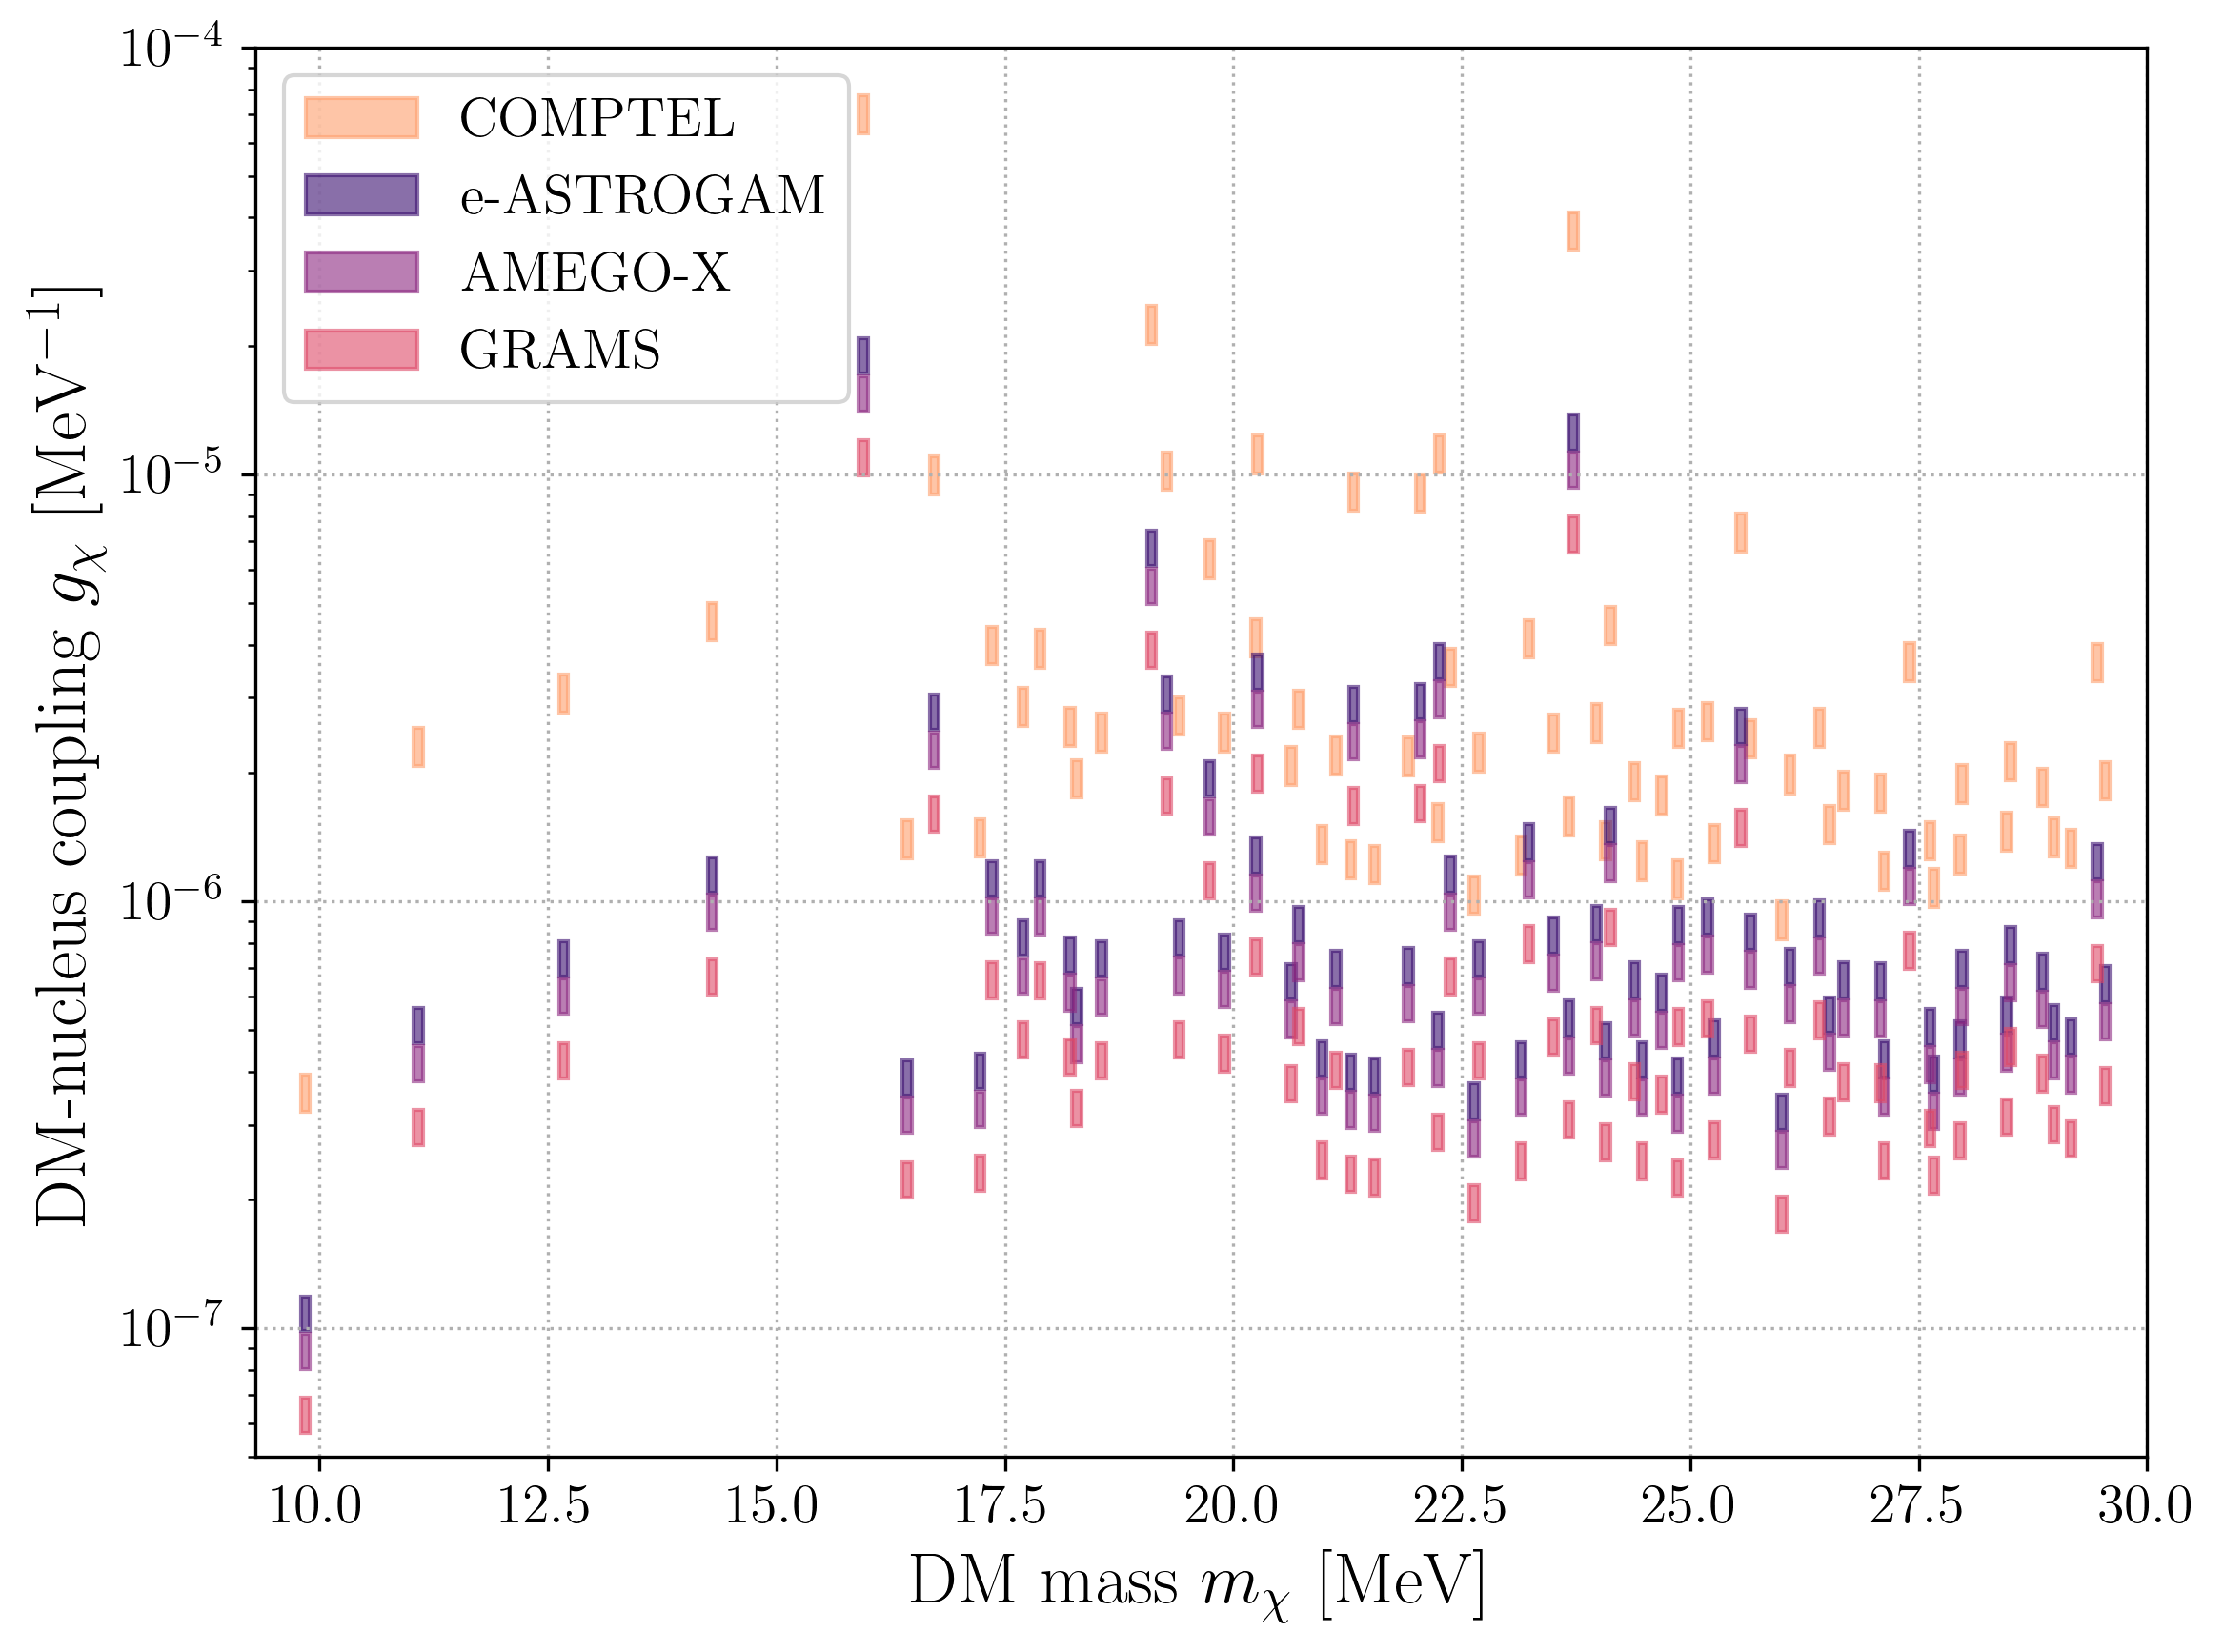

In [6]:
plot_limits(SELECT, False)

g_chi_all_limits


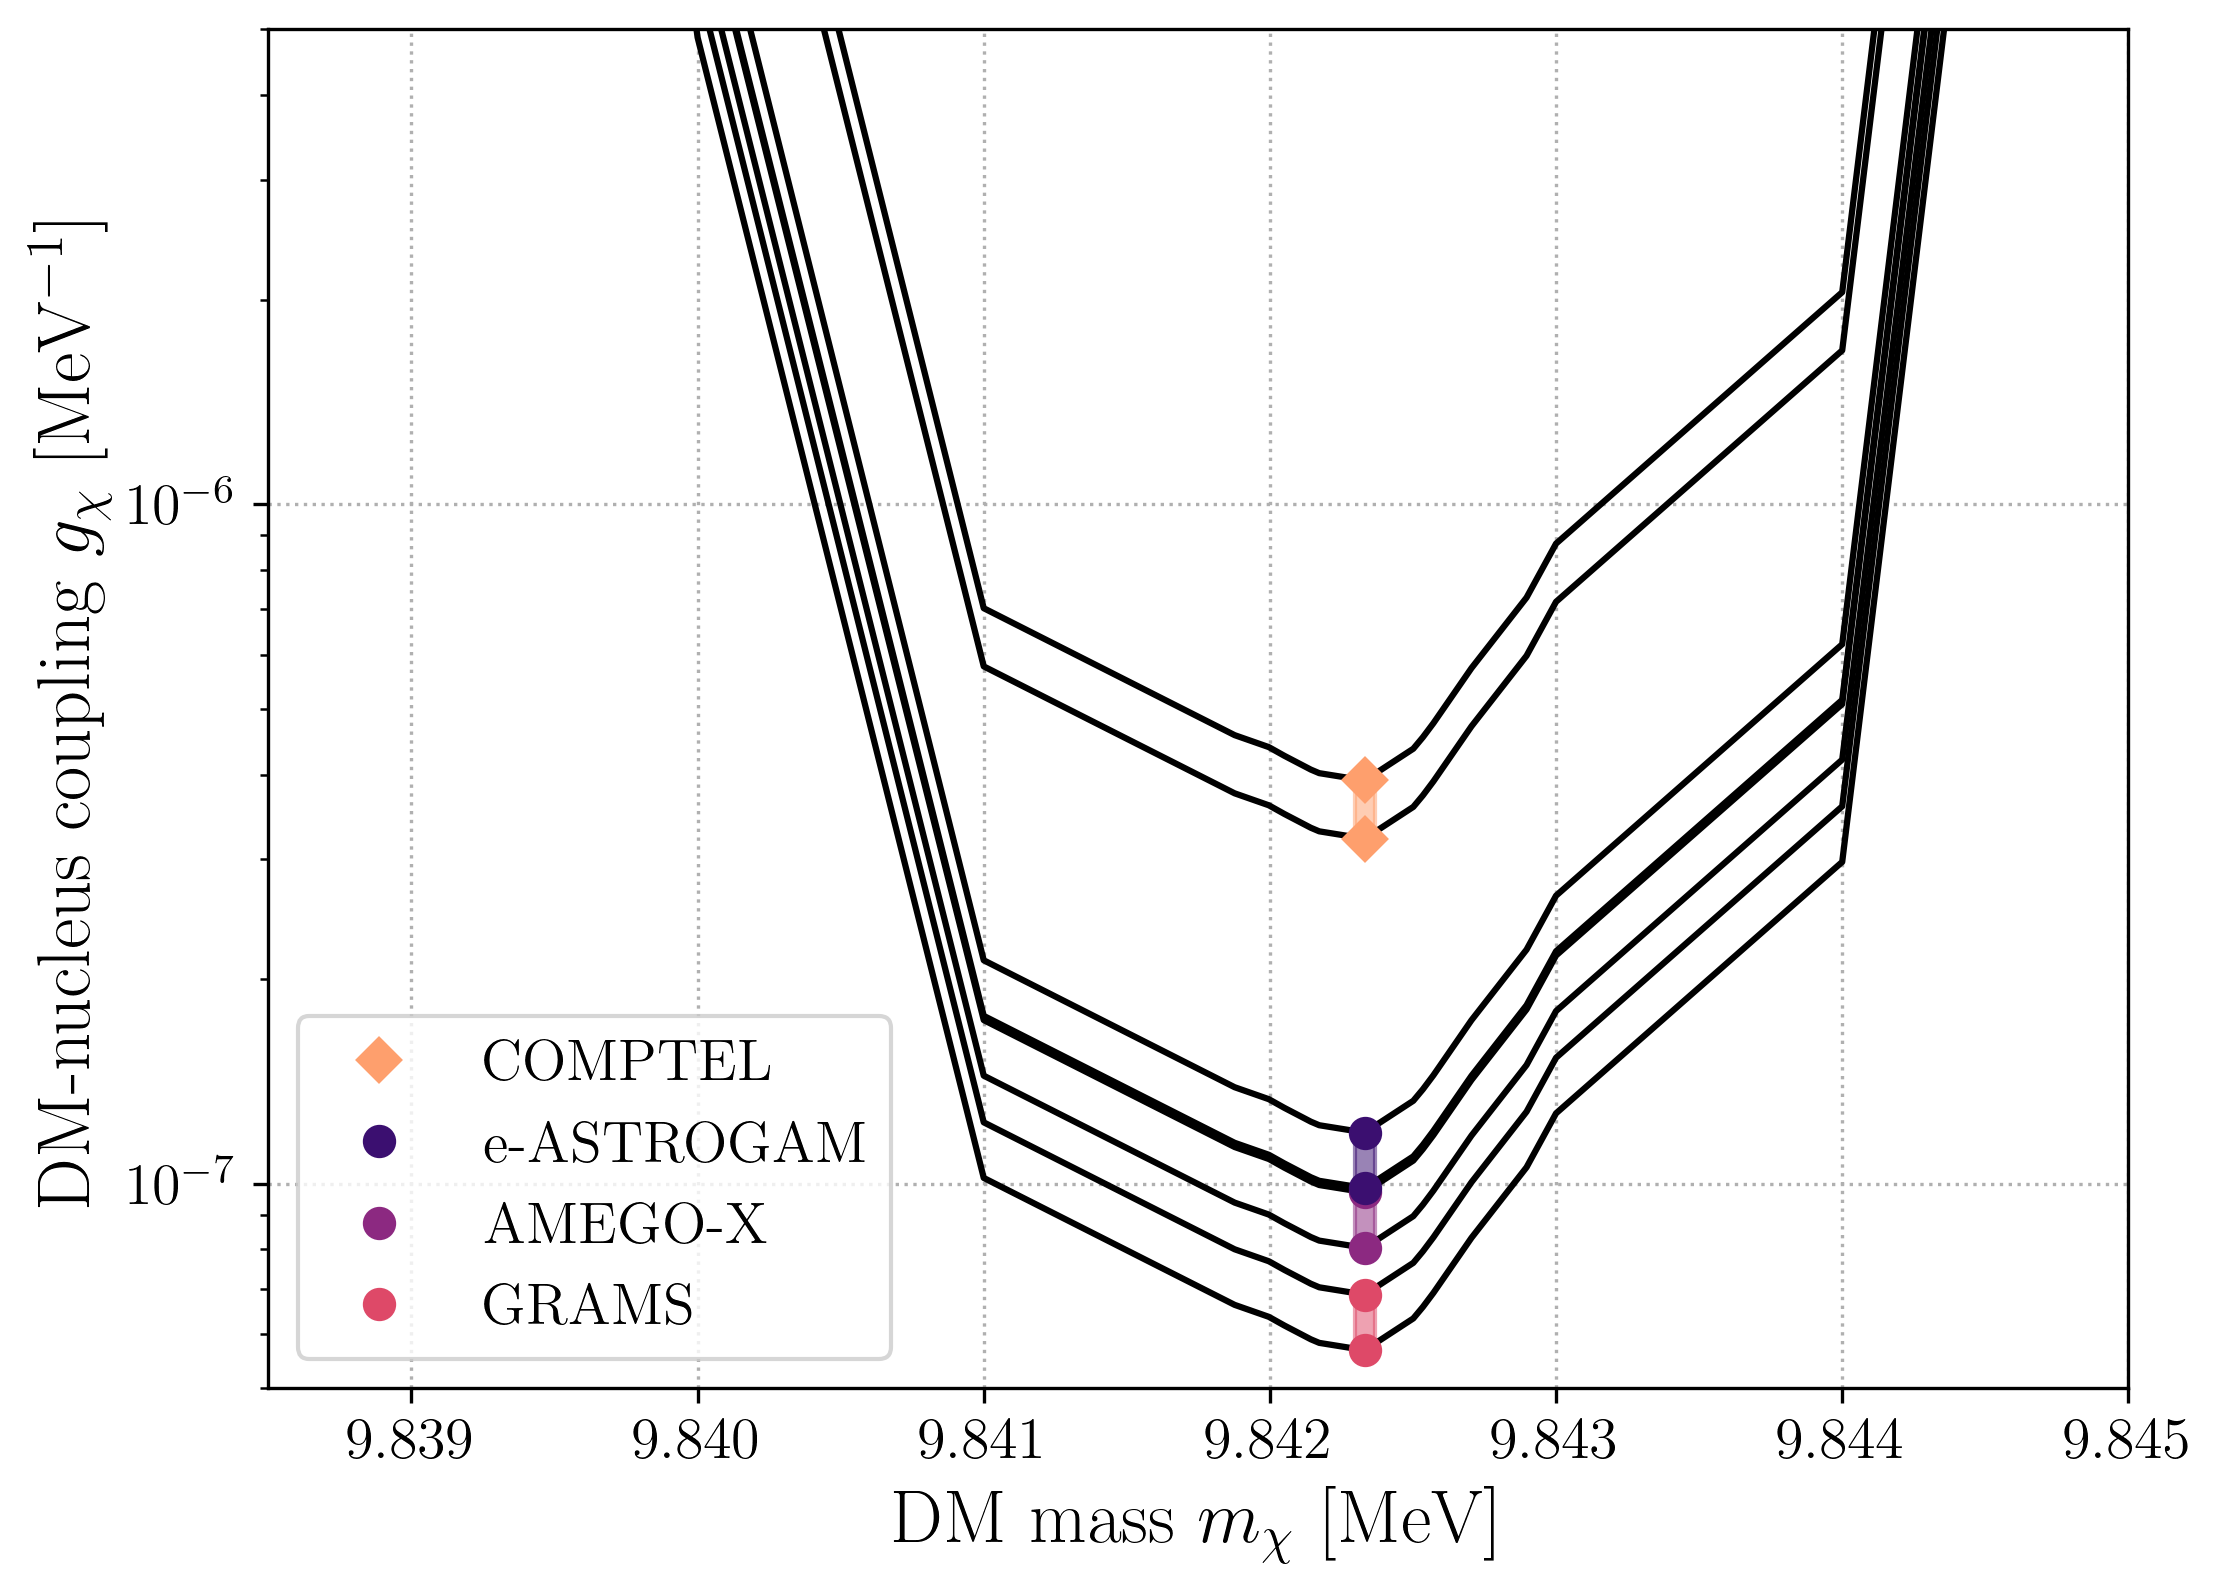

In [8]:
def plot_one_mass_g_chi_limits(plot_comptel, plot_proj, coloured_lines, save, rectangles):
    plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    plt.rc('text', usetex=True)
    matplotlib.rcParams["figure.dpi"] = 300
    plt.rcParams.update({'font.size': 14})

    exp_list = []
    if plot_proj:
        exp_list.extend(['GRAMS', 'AMEGO-X', 'e-ASTROGAM'])
        if not plot_comptel:
            figname = 'g_chi_projections'
        if plot_comptel:
            figname = 'g_chi_all_limits'
    if plot_comptel:
        exp_list.append('COMPTEL')
        if not plot_proj:
            figname = 'g_chi_limits_comptel'

    EXPERIMENT_DICT = {
    # experiment: [limit filename, color]
    'COMPTEL': ['COMPTEL_g_chi_limits_epsilon_2.0', magma['orange']],
    'e-ASTROGAM': ['e-ASTROGAM_g_chi_limits_epsilon_3.0', magma['purple']],
    'AMEGO-X': ['AMEGO-X_g_chi_limits_epsilon_2.0', magma['pink-purple']],
    'GRAMS': ['GRAMS_g_chi_limits_epsilon_1.0', magma['pink-red']]
}

    exp_epsilon_dict = {'COMPTEL': 0.02, 'GRAMS': 0.01, 'AMEGO-X': 0.02, 'e-ASTROGAM': 0.03}
    exp_marker_dict = {'COMPTEL': 'D', 'GRAMS': 'o', 'AMEGO-X': 'o', 'e-ASTROGAM': 'o'}
    colours = []
    exp_marker_size_dict = {'COMPTEL': 7, 'GRAMS': 7, 'AMEGO-X': 7, 'e-ASTROGAM': 7}

    # MAGMA: https://waldyrious.net/viridis-palette-generator/
    exp_colour_dict = {'COMPTEL': '#fe9f6d', 'e-ASTROGAM': '#3b0f70', 'AMEGO-X': '#8c2981', 'GRAMS': '#de4968'}
    colour_marker_dict = {'#fe9f6d': 'D', '#3b0f70': 'o', '#8c2981': 'o', '#de4968': 'o'}

    fig, ax = plt.subplots(figsize = fig_size)
    plt.grid(which = 'major', linestyle = 'dotted')
    plt.yscale('log')
    # plt.xticks(fontsize=16);#[10.0, 12.5, 15, 17.5, 20.0, 22.5, 25.0, 27.5, 30.0], fontsize=14); 
    # plt.yticks(fontsize=16)
    plt.xlabel(r'DM mass $m_\chi$  [MeV]', fontsize = axis_label_fontsize)
    plt.ylabel(r'DM-nucleus coupling $g_\chi$  [MeV$^{-1}$]', fontsize = axis_label_fontsize)
    plt.xlim(9.8385, 9.845)
    plt.ylim(5e-8, 5e-5)

    rect_width = 0.1/(30-9.3) * (9.845-9.838) * 1 / 0.48

    for exp in exp_list:
        colours.append(exp_colour_dict[exp])
        # print(exp)
        # plt.plot(0, 1e-10, 'o', exp_colour_dict[exp], label=exp)
        
        for nucleus in ['C12']:
            dEs = nuc_dict[nucleus]['dEs [MeV]'][0:1]

            for dE in dEs:
                # open file with all the minimum points
                filename = path + "{}/{}_g_chi_limits_epsilon_{}.txt".format(nucleus, exp, 100*exp_epsilon_dict[exp])
                min_limit_data = pd.read_csv(filename, sep='\t', \
                                                names = ['# dE [MeV]', 'm_chi [MeV]', 'min g_chi lower limit [MeV^-1]', 'min g_chi upper limit [MeV^-1]'], \
                                                comment = '#', float_precision='round_trip')
                m_chis_for_points = min_limit_data['m_chi [MeV]']
                g_chis_lower_points = min_limit_data['min g_chi lower limit [MeV^-1]']
                g_chis_upper_points = min_limit_data['min g_chi upper limit [MeV^-1]']

                filename_2 = path + "{}/dE_{}MeV/{}_g_chi_limits_epsilon_{}.txt".format(nucleus, dE, exp, 100*exp_epsilon_dict[exp])
                limit_data_unsorted = pd.read_csv(filename_2, sep='\t', \
                                         names = ['m_chi [MeV]', 'min g_chi lower limit [MeV^-1]', 'min g_chi upper limit [MeV^-1]'], \
                                         comment = '#', float_precision='round_trip')
                limit_data = limit_data_unsorted.sort_values(['m_chi [MeV]'])

                m_chis = limit_data['m_chi [MeV]']
                g_chis_lower = limit_data['min g_chi lower limit [MeV^-1]']
                g_chis_upper = limit_data['min g_chi upper limit [MeV^-1]']

                if coloured_lines:
                    plt.plot(m_chis, g_chis_lower, color=exp_colour_dict[exp])
                    plt.plot(m_chis, g_chis_upper, color=exp_colour_dict[exp])
                if not coloured_lines:
                    plt.plot(m_chis, g_chis_lower, 'black')
                    # plt.plot(m_chis, g_chis_lower, 'black', marker='o')
                    plt.plot(m_chis, g_chis_upper, 'black')
                    # plt.plot(m_chis, g_chis_upper, 'black', marker='o')
            
                plt.plot(m_chis_for_points, g_chis_lower_points, exp_marker_dict[exp], markersize=exp_marker_size_dict[exp], color=exp_colour_dict[exp])
                plt.plot(m_chis_for_points, g_chis_upper_points, exp_marker_dict[exp], markersize=exp_marker_size_dict[exp], color=exp_colour_dict[exp])

    # rectangles
    if rectangles:
        for exp in exp_list:
            for nucleus in ['O16', 'C12']:
                filename, color = EXPERIMENT_DICT[exp]
                c12 = pd.read_csv(f'g_chi_limits/C12/{filename}.txt', delimiter="\t", skiprows=1, header=None, names=col_names)
                o16 = pd.read_csv(f'g_chi_limits/O16/{filename}.txt', delimiter="\t", skiprows=1, header=None, names=col_names)
                co = pd.concat([c12, o16], ignore_index=True).sort_values(by='m_chi')
                for idx, row in co.iterrows():
                    legend_label = exp if idx == 0 else None
                    rect = plot_rect(row['m_chi'], row['lower limit'], row['upper limit'], color=color, alpha=0.3, label=legend_label, RECT_WIDTH = rect_width)
                    plt.gca().add_patch(rect)
    
    from matplotlib.lines import Line2D
    if coloured_lines:
        figname = figname + '_colour'
        lines = [Line2D([0], [0], marker=colour_marker_dict[c], markersize=7, color=c, linestyle='-') for c in colours[-1::-1]]
    if not coloured_lines:
        lines = [Line2D([0], [0], marker=colour_marker_dict[c], markersize=7, color=c, linestyle='') for c in colours[-1::-1]]
    plt.legend(lines, exp_list[-1::-1], loc=3, fontsize=legend_fontsize)
    plt.ylim(5e-8, 5e-6)
    if save:
        print(figname)
        plt.savefig('figures/g_chi_one_dE.pdf',bbox_inches="tight")
    return

plot_one_mass_g_chi_limits(plot_comptel = True, plot_proj = True, coloured_lines = False, save = False, rectangles = True)

    

# where is the delta function centered?

$$ m_\chi \approx \Delta E - \frac{1}{2} m_n v_n^2$$

which gives $v_n \approx 219$ km/s for all $m_\chi$.

In [13]:
for nucleus in ['C12', 'O16']:
    v_ns = []
    
    print(nucleus)
    # open file with all the minimum points
    exp_epsilon_dict = {'COMPTEL': 0.02, 'GRAMS': 0.01, 'AMEGO-X': 0.02, 'e-ASTROGAM': 0.03}
    for exp in ['COMPTEL', 'GRAMS', 'AMEGO-X', 'e-ASTROGAM']:
        print("    " + exp)
        filename = path + "{}/{}_g_chi_limits_epsilon_{}.txt".format(nucleus, exp, 100*exp_epsilon_dict[exp])
        min_limit_data = pd.read_csv(filename, sep='\t', \
                                        names = ['# dE [MeV]', 'most constraining m_chi [MeV]', 'min g_chi lower uncertainty [MeV^-1]', 'min g_chi upper uncertainty [MeV^-1]'], \
                                        comment = '#', float_precision='round_trip')
        dEs = min_limit_data['# dE [MeV]']
        m_chis = min_limit_data['most constraining m_chi [MeV]']
        
        for i in range(len(dEs)):
            v_n = np.sqrt(2*(dEs[i] - m_chis[i])/nuc_dict[nucleus]['mass [MeV]']) * 3e5
            v_ns.append(v_n)
            # print(v_n)

        print("        average v_n = {} km/s".format(np.mean(v_ns)))
    print('\n')

C12
    COMPTEL
        average v_n = 218.4710212646102 km/s
    GRAMS
        average v_n = 218.47102126461021 km/s
    AMEGO-X
        average v_n = 218.47102126461021 km/s
    e-ASTROGAM
        average v_n = 218.47102126461021 km/s


O16
    COMPTEL
        average v_n = 219.2438940368788 km/s
    GRAMS
        average v_n = 219.2438940368788 km/s
    AMEGO-X
        average v_n = 219.2438940368788 km/s
    e-ASTROGAM
        average v_n = 219.2438940368788 km/s


